TS Ketapang

In [1]:
from ts import *
import optuna
road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

def objective(trial):
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 100, 500)
    neighborhood_size = trial.suggest_int("neighborhood_size", 1, 200)

    routing_ts = ClusterBasedDroneRoutingTS(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    routes = routing_ts.optimize_all_clusters(
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    # Hitung total distance dari semua cluster (km)
    total_distance = 0
    for cid, cluster_routes in routes.items():
        for route, hotspot_indices in cluster_routes:
            locs = [routing_ts.road_points[cid]] + [routing_ts.coordinates[i] for i in hotspot_indices]
            dist_matrix = routing_ts.build_dist_matrix(locs)
            for i in range(len(route)-1):
                total_distance += dist_matrix[route[i]][route[i+1]]

    return total_distance

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

print("Best params:", study.best_params)
print("Best total distance:", study.best_value)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-21 18:59:30,462] A new study created in memory with name: no-name-fb1398cf-560d-41cd-83b2-fd1ae1278da3
[I 2025-10-21 18:59:33,095] Trial 0 finished with value: 951.7744025247148 and parameters: {'tabu_tenure': 12, 'max_iter': 385, 'neighborhood_size': 97}. Best is trial 0 with value: 951.7744025247148.
[I 2025-10-21 18:59:33,588] Trial 1 finished with value: 945.7004526616222 and parameters: {'tabu_tenure': 13, 'max_iter': 144, 'neighborhood_size': 38}. Best is trial 1 with value: 945.7004526616222.
[I 2025-10-21 18:59:34,973] Trial 2 finished with value: 945.0179341270002 and parameters: {'tabu_tenure': 30, 'max_iter': 241, 'neighborhood_size': 87}. Best is trial 2 with value: 945.0179341270002.
[I 2025-

Best params: {'tabu_tenure': 26, 'max_iter': 159, 'neighborhood_size': 159}
Best total distance: 944.1857200154361


In [ ]:
from ts import ClusterBasedDroneRoutingTS

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

# buat routing problem
routing_ts_opt = ClusterBasedDroneRoutingTS(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

print("Running TS with params:", study.best_params)

routes_opt = routing_ts_opt.optimize_all_clusters(
    tabu_tenure=study.best_params["tabu_tenure"],
    max_iter=study.best_params["max_iter"],
    neighborhood_size=study.best_params["neighborhood_size"]
)

# tampilkan hasil
routing_ts_opt.print_cluster_routes(routes_opt)
routing_ts_opt.visualize_cluster_routes(routes_opt)


TS Melawi

In [1]:
from ts import *
import optuna
def objective_melawi(trial):
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 100, 500)
    neighborhood_size = trial.suggest_int("neighborhood_size", 5, 200)

    road_points = {
        0: (-0.409011175, 112.1958254),
        1: (-0.592699463, 111.5859392),
        2: (-0.343085986, 111.7502586),
        3: (-0.569912205, 111.9740824)
    }

    n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

    routing_ts = ClusterBasedDroneRoutingTSMelawi(
        csv_file="hotspot_clustered_2.csv",
        road_points=road_points,
        n_drones=n_drones
    )

    routes = routing_ts.optimize_all_clusters(
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    total_distance = 0
    for cid, cluster_routes in routes.items():
        for route, hotspot_indices in cluster_routes:
            locs = [routing_ts.road_points[cid]] + [routing_ts.coordinates[i] for i in hotspot_indices]
            dist_matrix = routing_ts.build_dist_matrix(locs)
            for i in range(len(route)-1):
                total_distance += dist_matrix[route[i]][route[i+1]]

    return total_distance

study_melawi = optuna.create_study(
    direction="minimize",
    study_name="melawi_tabu_search_optimization"
)

study_melawi.optimize(objective_melawi, n_trials=200)

print("Best params:", study_melawi.best_params)
print("Best total distance:", study_melawi.best_value)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-21 16:30:43,155] A new study created in memory with name: melawi_tabu_search_optimization
[I 2025-10-21 16:30:45,016] Trial 0 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 23, 'max_iter': 193, 'neighborhood_size': 126}. Best is trial 0 with value: 511.0145741523468.
[I 2025-10-21 16:30:46,918] Trial 1 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 8, 'max_iter': 246, 'neighborhood_size': 164}. Best is trial 0 with value: 511.0145741523468.
[I 2025-10-21 16:30:48,189] Trial 2 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 365, 'neighborhood_size': 45}. Best is trial 0 with value: 511.0145741523468.
[I 2025-10-21 16:30

Best params: {'tabu_tenure': 23, 'max_iter': 193, 'neighborhood_size': 126}
Best total distance: 511.0145741523468


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Tabu Search, Fixed Version) ===

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H48 -> H9 -> H10 -> H6 -> H50 -> H51 -> R1
    Total distance: 76.11 km | Est. time: 42.28 min
  Drone 2 Route: R1 -> H7 -> H11 -> H8 -> H34 -> H52 -> R1
    Total distance: 49.62 km | Est. time: 27.56 min

Cluster 2 (Drones: 2)
  Drone 1 Route: R2 -> H39 -> H41 -> H40 -> H72 -> H69 -> H68 -> H22 -> H23 -> H70 -> H71 -> H24 -> H73 -> H74 -> H75 -> H76 -> R2
    Total distance: 62.89 km | Est. time: 34.94 min
  Drone 2 Route: R2 -> H65 -> H36 -> H64 -> H60 -> H62 -> H63 -> H61 -> H17 -> H18 -> H38 -> H20 -> H21 -> H19 -> H66 -> H67 -> R2
    Total distance: 96.18 km | Est. time: 53.43 min

Cluster 3 (Drones: 2)
  Drone 1 Route: R3 -> H1 -> H0 -> H2 -> H3 -> H4 -> R3
    Total distance: 48.45 km | Est. time: 26.92 min
  Drone 2 Route: R3 -> H54 -> H15 -> H16 -> H55 -> H56 -> R3
    Total distance: 54.07 km | Est. tim

d:\ribkaadevina\college\8.S2\2. SEM 2\3. Topik dalam Soft Computing\softcomp\ts.py:501: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


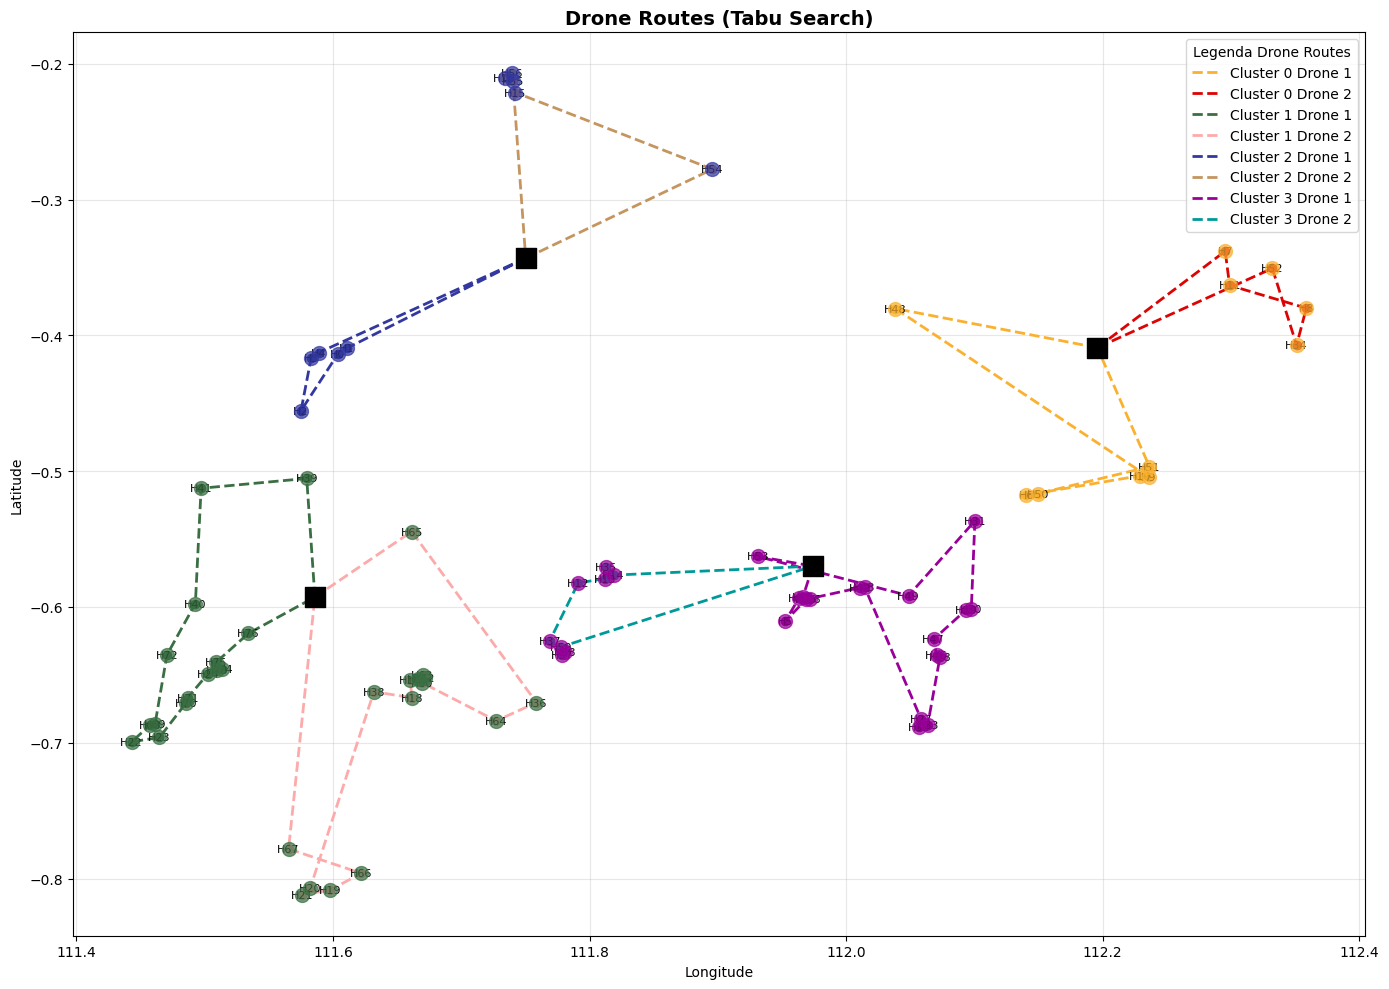

In [1]:
from ts import *

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing_ts_opt_melawi = ClusterBasedDroneRoutingTSMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones=n_drones
)

# Jalankan Tabu Search dengan parameter terbaik
routes_opt_melawi = routing_ts_opt_melawi.optimize_all_clusters(
    tabu_tenure=23,
    max_iter=193,
    neighborhood_size=126
)

routing_ts_opt_melawi.print_cluster_routes(routes_opt_melawi)
routing_ts_opt_melawi.visualize_cluster_routes(routes_opt_melawi)


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

 Running Tabu Search for Melawi with best Optuna params:
{'tabu_tenure': 23, 'max_iter': 193, 'neighborhood_size': 126}

=== DRONE ROUTES (Tabu Search, Fixed Version) ===

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H48 -> H9 -> H10 -> H6 -> H50 -> H51 -> R1
    Total distance: 76.11 km | Est. time: 42.28 min
  Drone 2 Route: R1 -> H7 -> H11 -> H8 -> H34 -> H52 -> R1
    Total distance: 49.62 km | Est. time: 27.56 min

Cluster 2 (Drones: 2)
  Drone 1 Route: R2 -> H39 -> H41 -> H40 -> H72 -> H69 -> H68 -> H22 -> H23 -> H70 -> H71 -> H24 -> H73 -> H74 -> H75 -> H76 -> R2
    Total distance: 62.89 km | Est. time: 34.94 min
  Drone 2 Route: R2 -> H65 -> H36 -> H64 -> H60 -> H62 -> H63 -> H61 -> H17 -> H18 -> H38 -> H20 -> H21 -> H19 -> H66 -> H67 -> R2
    Total distance: 96.18 km | Est. time: 53.43 min

Cluster 3 (Drones: 2)
  Drone 1 Route: R3 -> H1 -> H0 -> H2 -> H3 -> H4 -> R3
    Total distance: 48.45 km | 

d:\ribkaadevina\college\8.S2\2. SEM 2\3. Topik dalam Soft Computing\softcomp\ts.py:508: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


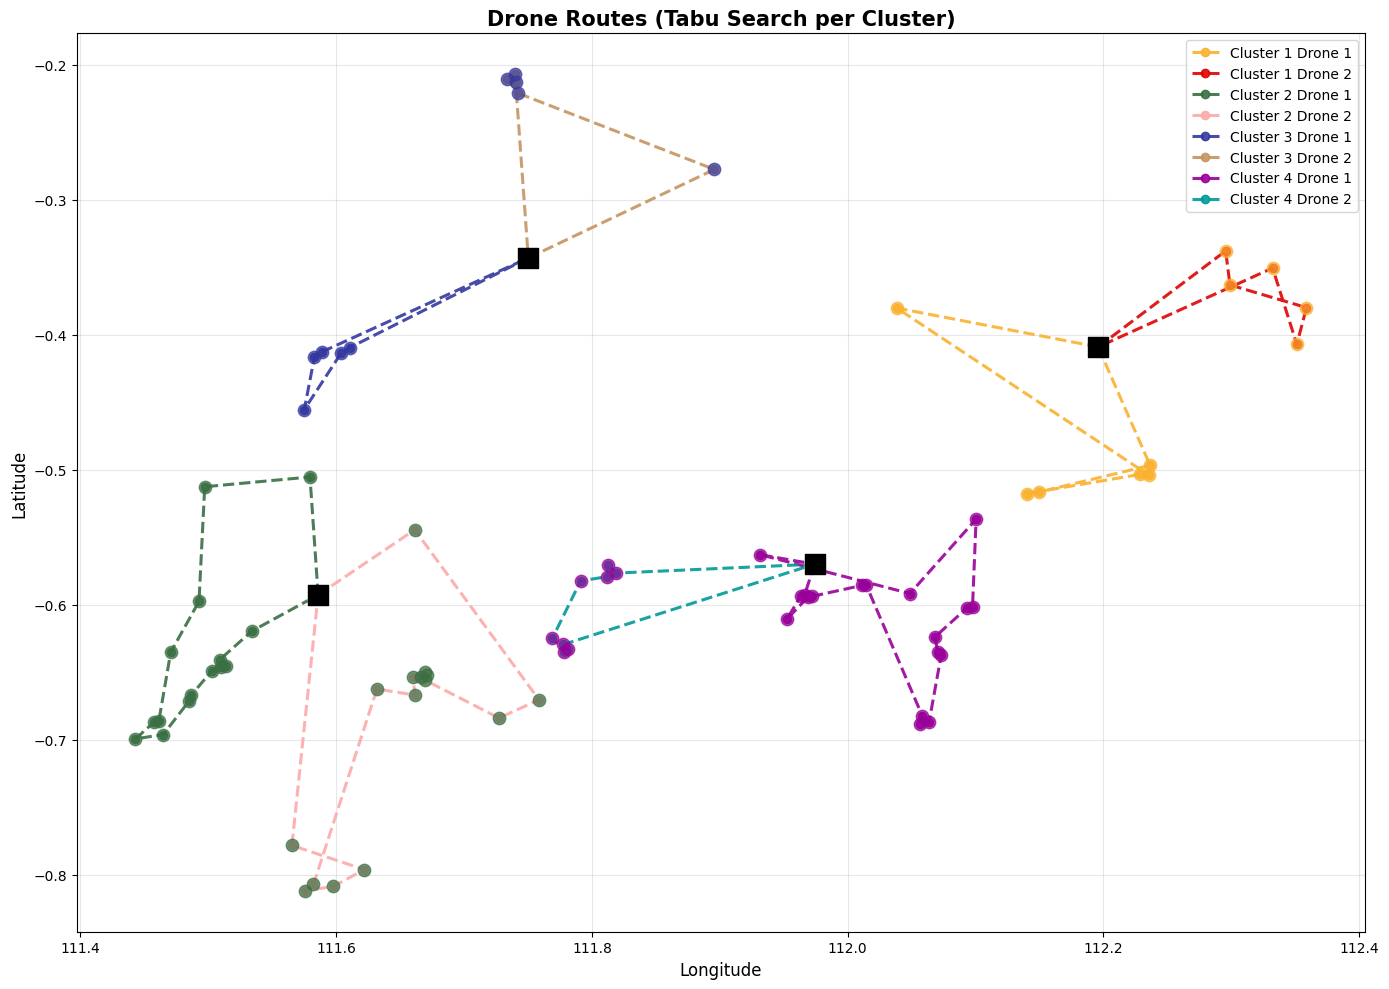

In [2]:
best_params = study_melawi.best_params

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing_ts_opt_melawi = ClusterBasedDroneRoutingTSMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones=n_drones
)

print("\n Running Tabu Search for Melawi with best Optuna params:")
print(best_params)

# Jalankan Tabu Search dengan parameter terbaik
routes_opt_melawi = routing_ts_opt_melawi.optimize_all_clusters(
    tabu_tenure=best_params["tabu_tenure"],
    max_iter=best_params["max_iter"],
    neighborhood_size=best_params["neighborhood_size"]
)

routing_ts_opt_melawi.print_cluster_routes(routes_opt_melawi)
routing_ts_opt_melawi.visualize_cluster_routes(routes_opt_melawi)


GA TS Ketapang

In [2]:
import optuna
import warnings
from ga_ts import *
warnings.filterwarnings("ignore")

road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}

def objective(trial):
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 15)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    routing = ClusterBasedDroneRoutingHybridTabuOptimized(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2},
        tabu_tenure=tt,
        tabu_budget=tb
    )

    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("\n=== 🏆 Best Configuration ===")
print(f"Best params: {study.best_params}")
print(f"Best total distance: {study.best_value:.2f} km")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-21 02:46:46,393] A new study created in memory with name: no-name-acad482d-e653-4998-ac7d-1282548f92b7
[W 2025-10-21 02:46:54,480] Trial 0 failed with parameters: {'population_size': 36, 'generations': 146, 'mutation_rate': 0.18645555544986453, 'tabu_tenure': 9, 'tabu_budget': 104} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_28916\4259707966.py", line 27, in objective
    routes = routing.optimize_all_clusters(
        

KeyboardInterrupt: 

In [ ]:
from ga_ts import *
road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}
best_params = study.best_params

routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=best_params["tabu_tenure"],
    tabu_budget=best_params["tabu_budget"]
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=best_params["population_size"],
    generations=best_params["generations"],
    mutation_rate=best_params["mutation_rate"]
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes_maps(routes)


=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 75, 24, 25, 26, 64, 66, 65, 50, 63, 23, 22, 21, 62, 15, 18, 74, 53, 54, 51, 55, 56, 1]
    Total distance: 276.37 km | Time: 153.54 min 
  Drone 2 Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
    Total distance: 130.28 km | Time: 72.38 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]
    Total distance: 117.02 km | Time: 65.01 min 


d:\ribkaadevina\college\8.S2\2. SEM 2\3. Topik dalam Soft Computing\softcomp\ga_ts.py:804: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


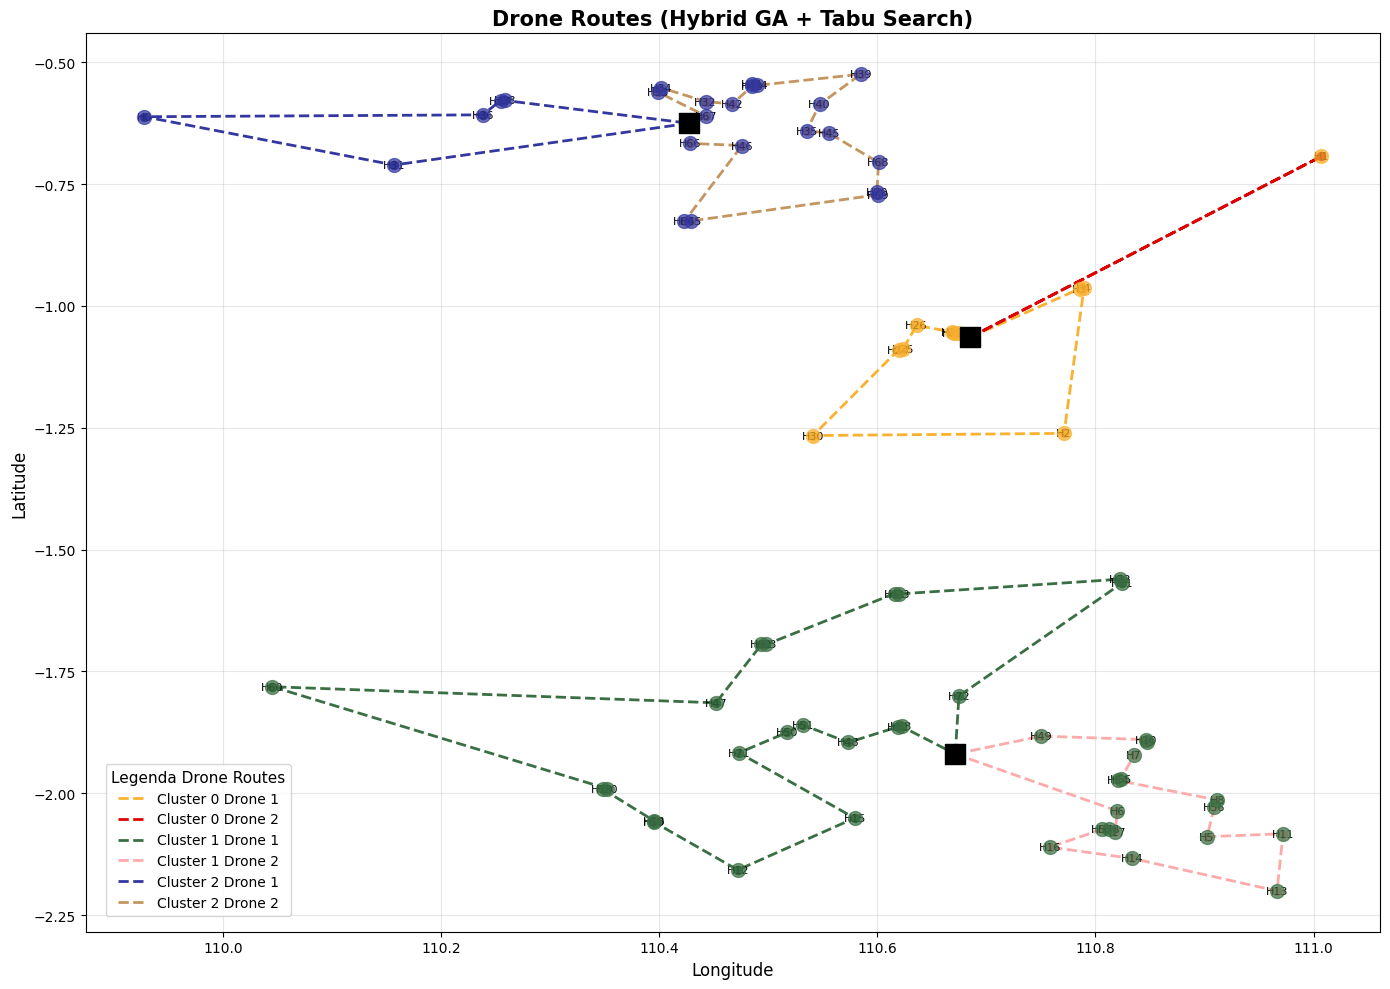

✅ Variabel peta terdeteksi: map_6641977ef8a992c5dd8ef77175186699
✅ Drone routes (warna kustom + legenda) berhasil ditambahkan ke peta: forest_fire_clusters_with_drone_routes.html


In [1]:
from ga_ts import *
road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=11,
    tabu_budget=82
)

routes = routing_hybrid.optimize_all_clusters(
    population_size=32,
    generations=140,
    mutation_rate=0.21799743834517937
)

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes_maps(routes)

GA TS Melawi

In [ ]:
import optuna
import warnings
warnings.filterwarnings("ignore")

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

def objective_melawi(trial):
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 20)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    routing = ClusterBasedDroneRoutingHybridTabuMelawi(
        csv_file="hotspot_clustered.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2, 3: 2},
        tabu_tenure=tt,
        tabu_budget=tb
    )

    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance


study_melawi = optuna.create_study(direction="minimize", study_name="melawi_hybrid_ga_tabu")
study_melawi.optimize(objective_melawi, n_trials=20)

print("\n=== 🏆 Best Configuration (Melawi Hybrid GA + Tabu) ===")
print(f"Best params: {study_melawi.best_params}")
print(f"Best total distance: {study_melawi.best_value:.2f} km")


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 52, 10, 54, 14, 13, 55, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 38, 12, 56, 11, 15, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 69, 40, 68, 70, 23, 24, 25, 71, 22, 64, 66, 67, 65, 21, 42, 1]
    Total distance: 90.55 km | Time: 50.31 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 5, 4, 8, 7, 6, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d

d:\ribkaadevina\college\8.S2\2. SEM 2\3. Topik dalam Soft Computing\softcomp\ga_ts.py:1130: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


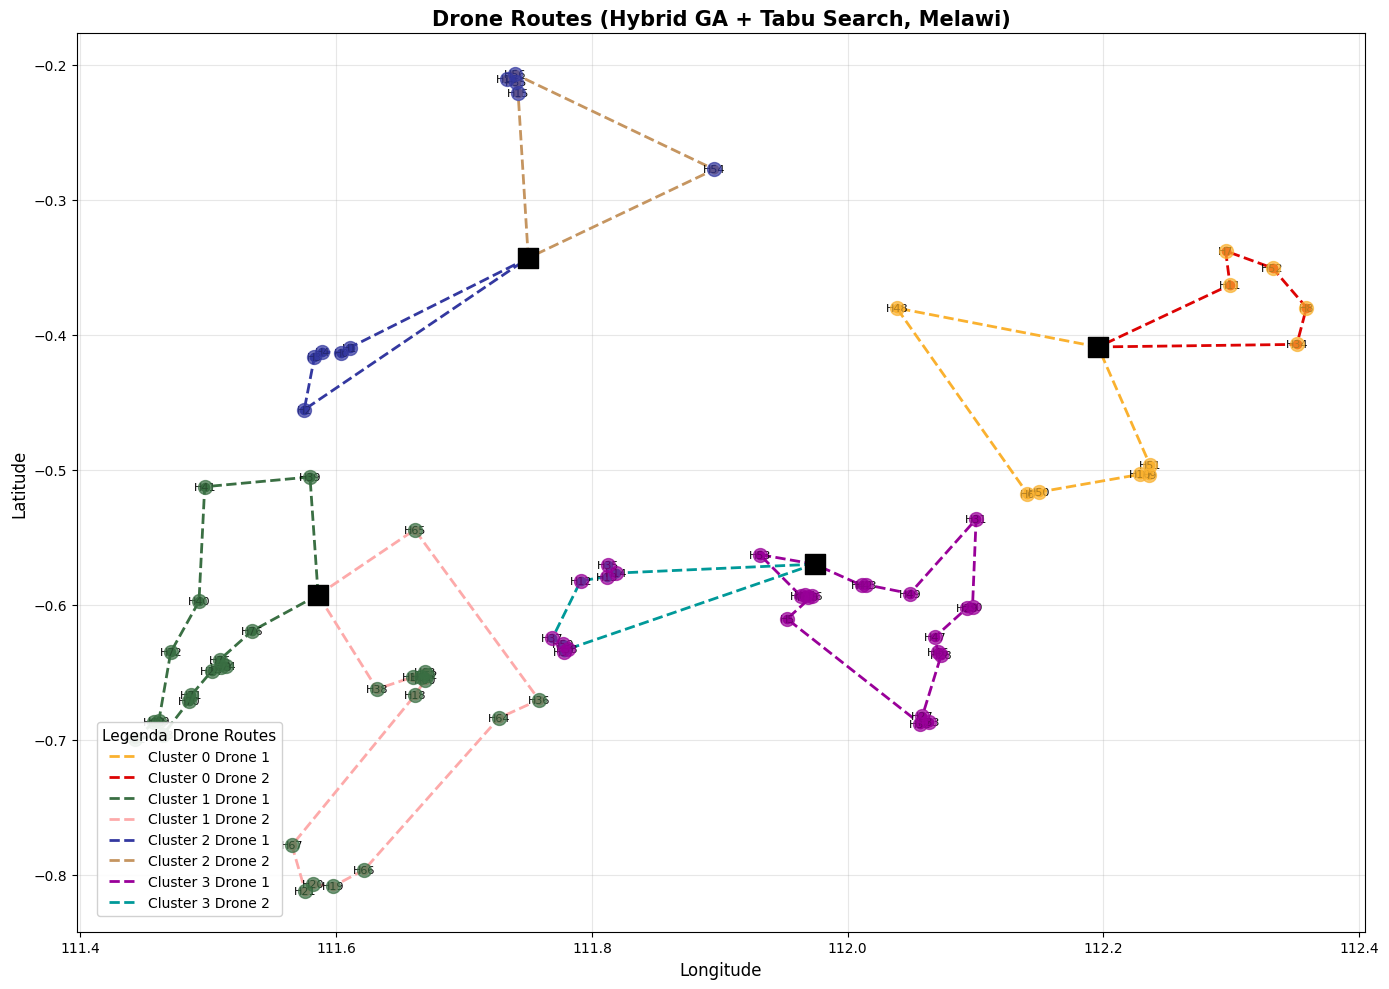

✅ Variabel peta terdeteksi: map_a6dd33d71f96131d7cc91617eedbb730
✅ Rute drone (Hybrid GA + Tabu, Melawi) berhasil ditambahkan ke peta: forest_fire_clusters_with_ga_tabu_routes_melawi.html


In [2]:
from ga_ts import *

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}
routing_best = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2, 3: 2},
    tabu_tenure=9,
    tabu_budget=92
)

routes_best = routing_best.optimize_all_clusters(
    population_size=26,
    generations=116,
    mutation_rate=0.17438163424921083
)

routing_best.print_cluster_routes(routes_best)
routing_best.visualize_cluster_routes(routes_best)
routing_best.visualize_cluster_routes_maps(routes_best)
